<a href="https://colab.research.google.com/github/SanketH17/ML_Project---Loan-price-prediction/blob/main/loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Status Prediction 

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


### Importing Libraries

In [61]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

### Importing data 

In [3]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [4]:
print (train.shape, test.shape)

(614, 13) (367, 12)


### Viewing the train dataset

In [63]:
train.head(10) 

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,employed_Yes,married_Yes
0,0,0,5849,0.0,146,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128,1.0,2,0,1,0,1
2,0,0,3000,0.0,66,1.0,0,1,1,1,1
3,0,1,2583,2358.0,120,1.0,0,1,1,0,1
4,0,0,6000,0.0,141,1.0,0,1,1,0,0
5,2,0,5417,4196.0,267,1.0,0,1,1,1,1
6,0,1,2333,1516.0,95,1.0,0,1,1,0,1
7,3,0,3036,2504.0,158,0.0,1,0,1,0,1
8,2,0,4006,1526.0,168,1.0,0,1,1,0,1
9,1,0,12841,10968.0,349,1.0,1,0,1,0,1


In [64]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    int64  
 1   Education          614 non-null    int64  
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    int64  
 5   Credit_History     614 non-null    float64
 6   Property_Area      614 non-null    int64  
 7   Loan_Status        614 non-null    int64  
 8   Male               614 non-null    uint8  
 9   employed_Yes       614 non-null    uint8  
 10  married_Yes        614 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 40.3 KB


In [65]:
train.isnull().sum()

Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
Male                 0
employed_Yes         0
married_Yes          0
dtype: int64

### Viewing the test dataset

In [66]:
test.head(10)

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,LP001015,0,0,5720,0,110,1.0,0,1,0,1
1,LP001022,1,0,3076,1500,126,1.0,0,1,0,1
2,LP001031,2,0,5000,1800,208,1.0,0,1,0,1
3,LP001035,2,0,2340,2546,100,1.0,0,1,0,1
4,LP001051,0,1,3276,0,78,1.0,0,1,0,0
5,LP001054,0,1,2165,3422,152,1.0,0,1,1,1
6,LP001055,1,1,2226,0,59,1.0,1,0,0,0
7,LP001056,2,1,3881,0,147,0.0,2,1,0,1
8,LP001059,2,0,13633,0,280,1.0,0,1,0,1
9,LP001067,0,1,2400,2400,123,1.0,1,1,0,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Exploring and Preparing the data

In [11]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


#### Gender

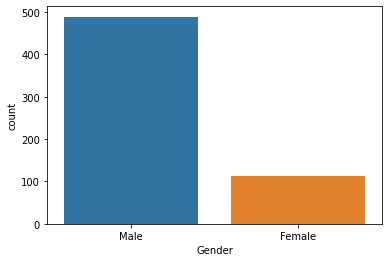

In [12]:
sns.countplot(train['Gender'])

In [13]:
pd.crosstab(train.Gender, train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


The male are in large number as compared to female applicants.Also many of them have positive Loan Status. Further Binarization of this feature should be done,

In [14]:
train.Gender = train.Gender.fillna(train.Gender.mode())
test.Gender = test.Gender.fillna(test.Gender.mode())

sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex = pd.get_dummies(test['Gender'] , drop_first = True )
test.drop(['Gender'], axis = 1 , inplace =True)
test = pd.concat([test , sex ] , axis = 1)

#### Dependants

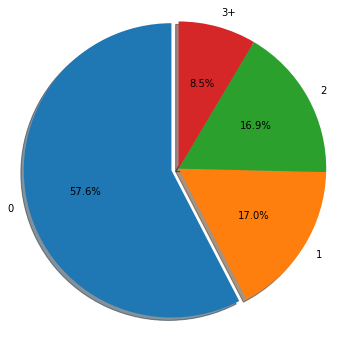

In [15]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [16]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
pd.crosstab(train.Dependents , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


The applicants with highest number of dependants are least in number whereas applicants with no dependance are greatest among these.

In [18]:
train.Dependents = train.Dependents.fillna("0")
test.Dependents = test.Dependents.fillna("0")

rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)

#### Credit History

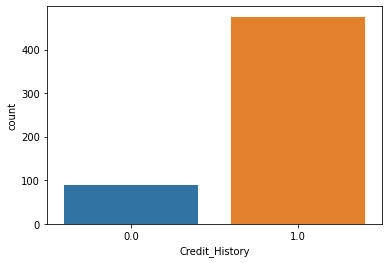

In [19]:
sns.countplot(train['Credit_History'])

In [20]:
pd.crosstab(train.Credit_History , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [21]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History  = test.Credit_History.fillna(test.Credit_History.mode()[0])

#### Self Employed

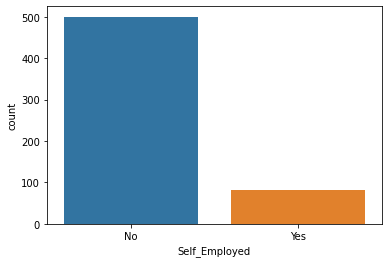

In [22]:
sns.countplot(train['Self_Employed'])

In [23]:
pd.crosstab(train.Self_Employed , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [24]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode())

self_Employed = pd.get_dummies(train['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(test['Self_Employed'] , prefix = 'employed' ,drop_first = True )
test.drop(['Self_Employed'], axis = 1 , inplace =True)
test = pd.concat([test , self_Employed ] , axis = 1)

#### Married

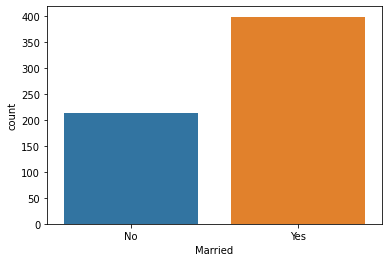

In [25]:
sns.countplot(train.Married)

In [26]:
pd.crosstab(train.Married , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [27]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

married = pd.get_dummies(train['Married'] , prefix = 'married',drop_first = True )
train.drop(['Married'], axis = 1 , inplace =True)
train = pd.concat([train , married ] , axis = 1)

married = pd.get_dummies(test['Married'] , prefix = 'married', drop_first = True )
test.drop(['Married'], axis = 1 , inplace =True)
test = pd.concat([test , married ] , axis = 1)

#### Loan Amount Term and Loan Amount

In [28]:
train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean()).astype(int)
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean()).astype(int)

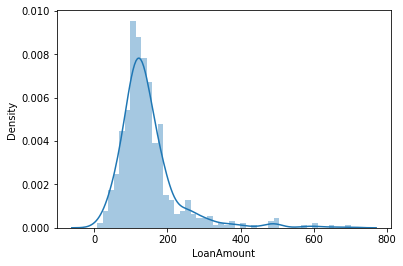

In [29]:
sns.distplot(train['LoanAmount'])

We observe no outliers in the continuous variable Loan Amount

#### Education

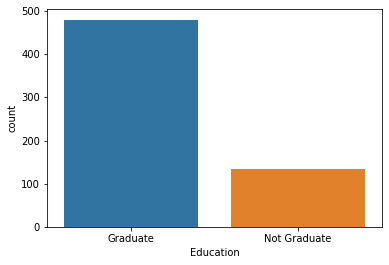

In [30]:
sns.countplot(train.Education)

In [31]:
train['Education'] = train['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
test['Education'] = test['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

#### Property Area

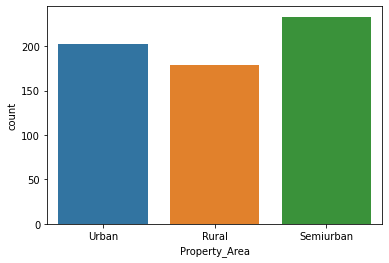

In [32]:
sns.countplot(train.Property_Area)

In [33]:
train['Property_Area'] = train['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

test.Property_Area = test.Property_Area.fillna(test.Property_Area.mode())
test['Property_Area'] = test['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)


#### Co-Applicant income and Applicant income

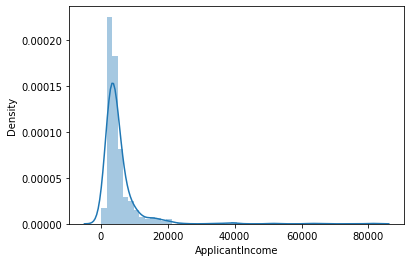

In [34]:
sns.distplot(train['ApplicantIncome'])

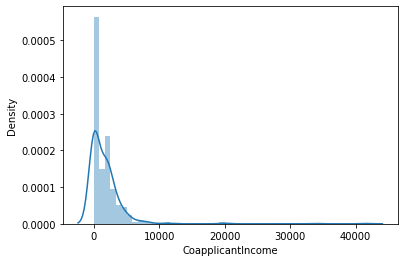

In [35]:
sns.distplot(train['CoapplicantIncome'])

### Target Variable : Loan Status

In [36]:
train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

###### Dropping the ID column

In [37]:
train.drop(['Loan_ID'], axis = 1 , inplace =True)

## View the datasets

In [67]:
train.head(10)

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,employed_Yes,married_Yes
0,0,0,5849,0.0,146,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128,1.0,2,0,1,0,1
2,0,0,3000,0.0,66,1.0,0,1,1,1,1
3,0,1,2583,2358.0,120,1.0,0,1,1,0,1
4,0,0,6000,0.0,141,1.0,0,1,1,0,0
5,2,0,5417,4196.0,267,1.0,0,1,1,1,1
6,0,1,2333,1516.0,95,1.0,0,1,1,0,1
7,3,0,3036,2504.0,158,0.0,1,0,1,0,1
8,2,0,4006,1526.0,168,1.0,0,1,1,0,1
9,1,0,12841,10968.0,349,1.0,1,0,1,0,1


In [68]:
test.head(10)

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,LP001015,0,0,5720,0,110,1.0,0,1,0,1
1,LP001022,1,0,3076,1500,126,1.0,0,1,0,1
2,LP001031,2,0,5000,1800,208,1.0,0,1,0,1
3,LP001035,2,0,2340,2546,100,1.0,0,1,0,1
4,LP001051,0,1,3276,0,78,1.0,0,1,0,0
5,LP001054,0,1,2165,3422,152,1.0,0,1,1,1
6,LP001055,1,1,2226,0,59,1.0,1,0,0,0
7,LP001056,2,1,3881,0,147,0.0,2,1,0,1
8,LP001059,2,0,13633,0,280,1.0,0,1,0,1
9,LP001067,0,1,2400,2400,123,1.0,1,1,0,0


# Visualizing the correlations and relation

### Plot between LoanAmount, Applicant Income, Employement and Gender

*What is the relation of Loan taken between men and women?<br> Did the employed ones were greater in number to take Loan ?<br> What is distribution of Loan Amount and Income?*

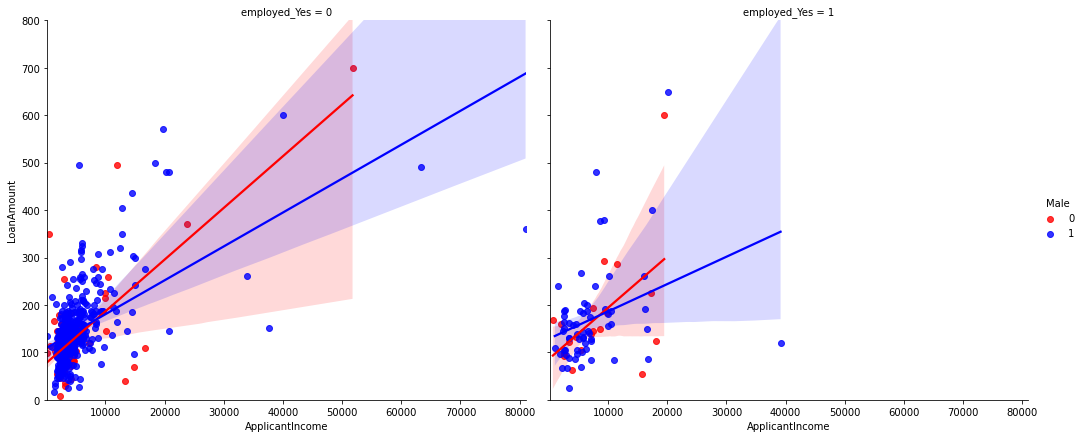

In [40]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= train , col='employed_Yes', hue='Male',
          palette= ["Red" , "Blue","Yellow"] ,aspect=1.2,size=6)
g.set(ylim=(0, 800))
##Relation Between the Male or female Applicant's income , Loan taken and Self employment.

- Above graph tells:
    - The male applicants take more amount of loan than female.
    - The males are higher in number of "NOT self employed" category.
    - The amount is still larger in the income range in (0 to 20000).
    - Also we observe that majority of applicants are NOT self employed.
    - Highest Loan amount taken is by the female applicant of about 700 which is NOT self employed.
    - The majority of income taken is about 0-200 with income in the range 0-20000. 
    - The line plotted shows that with increase in income the amount of loan increases with almost same slope for the case of women in both the cases but a slightely lesser slope in the case of men in Self- Employed category as compared to non-self employed.


### Boxplots for  relation between Property area, amount of Loan and Education qualification 

Further we analyse the relation between education status,loan taken and property area 


- Property_Area: 
    - `Urban      :0`
    - `Semiurban  :1`
    - `Rural      :2`

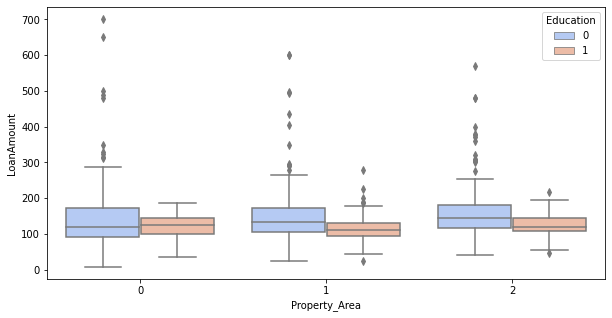

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=train, palette="coolwarm")

- The above boxplot signifies that,
    - In the Urban area the non graduates take slightly more loan than graduates. 
    - In the Rural and semiurban area the graduates take more amount of Loan than non graduates 
    - The higher values of Loan are mostly from Urban area 
    - The semiurban area and rural area both have one unusual Loan amount close to zero.


### Crosstab for relation between Credit History and Loan status.

In [42]:
train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

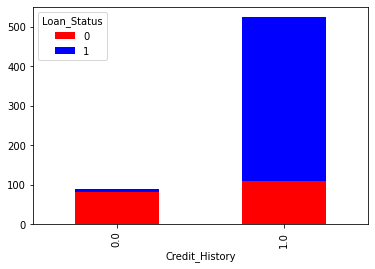

In [43]:
lc = pd.crosstab(train['Credit_History'], train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

- The credit history vs Loan Status indicates:
    - The good credit history applicants have more chances of getting Loan.
    - With better credit History the Loan amount given was greater too.
    - But many were not given loan in the range 0-100
    - The applicant with poor credit history were handled in the range 0-100 only.

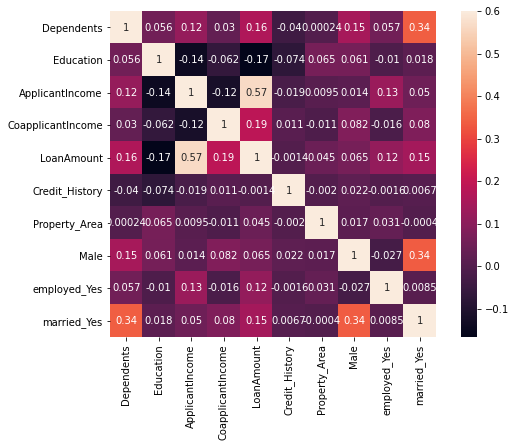

In [44]:
plt.figure(figsize=(9,6))
sns.heatmap(train.drop('Loan_Status',axis=1).corr(), vmax=0.6, square=True, annot=True)

## Prediction

The problem is of **Classification** as observed and concluded from the data and visualisations.

In [45]:
X = train.drop('Loan_Status' , axis = 1 )
y = train['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

In [46]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

83.78378378378379

In [47]:

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

80.0

In [48]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

61.08108108108108

In [49]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

82.16216216216216

In [50]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

70.27027027027027

In [51]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

82.16216216216216

In [52]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,83.783784
3,Naive Bayes,82.162162
5,Gradient Boosting Classifier,82.162162
1,Random Forrest,80.000000
4,SVM,70.270270
2,K- Nearest Neighbour,61.081081


The highest classification accuracy is shown by Logistic Regression of about 83.24 %

Let us Check th feature importance,

In [53]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Credit_History,0.246
ApplicantIncome,0.225
LoanAmount,0.208
CoapplicantIncome,0.118
Dependents,0.055
Property_Area,0.052
married_Yes,0.028
Education,0.025
Male,0.024


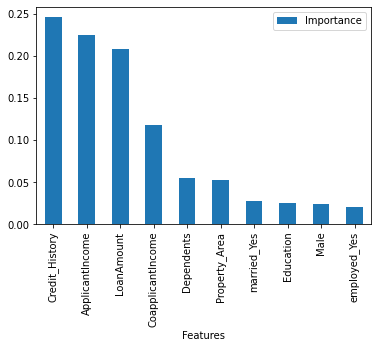

In [54]:
importances.plot.bar()

Credit History has the maximum importance and empoloyment has the least!

### Summarizing

The Loan status has better relation with features such as Credit History, Applicant's Income, Loan Amount needed by them, Family status(Depenedents) and Property Area which are generally considered by the loan providing organisations. 

Finally the we predict over unseen dataset using the Logistic Regression and Random Forest model

In [55]:
df_test = test.drop(['Loan_ID'], axis = 1)

In [56]:
df_test.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,0,0,5720,0,110,1.0,0,1,0,1
1,1,0,3076,1500,126,1.0,0,1,0,1
2,2,0,5000,1800,208,1.0,0,1,0,1
3,2,0,2340,2546,100,1.0,0,1,0,1
4,0,1,3276,0,78,1.0,0,1,0,0


In [57]:
p_log = logmodel.predict(df_test)

In [58]:
p_rf = random_forest.predict(df_test)

In [59]:
predict_combine = np.zeros((df_test.shape[0]))

for i in range(0, test.shape[0]):
    temp = p_log[i] + p_rf[i]
    if temp>=2:
        predict_combine[i] = 1
predict_combine = predict_combine.astype('int')

In [60]:
submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": predict_combine
    })

submission.to_csv("results.csv", encoding='utf-8', index=False)


# Thank you
